# Proyek Predictive Analytics: [Diabetes prediction dataset]
- **Nama:** [Sinta Ezra Wati Gulo]
- **Email:** [sintaezra04@gmail.com]
- **ID Dicoding:** [sinta_ezra]

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

## Data Understanding

Selanjutnya adalah memahami data, untuk memahami data dapat dilakukan dalam beberapa tahapan berikut:

- Data loading
- Exploratory Data Analysis - Deskripsi Variabel
- Exploratory Data Analysis - Menangani Missing Value dan Outliers
- Exploratory Data Analysis - Univariate Analysis
- Exploratory Data Analysis - Multivariate Analysis

### Data Loading

In [2]:
# Load dataset
df = pd.read_csv('data/diabetes_prediction_dataset.csv')

# Melihat data
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Output kode di atas memberikan informasi sebagai berikut:

- Ada 100.000 baris dalam dataset.
- Terdapat 9 kolom yaitu: `gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level`, dan `diabetes`.

### Exploratory Data Analysis - Deskripsi Variabel

Berdasarkan informasi dari Kaggle, variabel-variabel pada Diabetes prediction dataset adalah sebagai berikut:
* `gender`: mengacu pada jenis kelamin biologis seseorang, yang dapat memengaruhi kerentanan terhadap diabetes. Terdapat tiga kategori: laki-laki, perempuan, dan lainnya.
* `age`: faktor penting karena diabetes lebih sering terdiagnosis pada orang dewasa yang lebih tua. Rentang usia dalam dataset ini adalah 0–80 tahun.
* `hypertension`: kondisi medis di mana tekanan darah dalam arteri terus-menerus tinggi. Bernilai 0 atau 1, di mana: 0 berarti tidak memiliki hipertensi dan 1 berarti memiliki hipertensi.
* `heart_disease`:  kondisi medis lain yang berkaitan dengan peningkatan risiko diabetes. Bernilai 0 atau 1, di mana: 0 berarti tidak memiliki penyakit jantung dan 1 berarti memiliki penyakit jantung.
* `smoking_history`: riwayat merokok juga dianggap sebagai faktor risiko diabetes dan dapat memperburuk komplikasi diabetes. Dalam dataset ini, terdapat 6 kategori yaitu not current, former, No Info, current, never, dan ever.
* `bmi `: ukuran lemak tubuh berdasarkan berat dan tinggi badan. Nilai BMI yang tinggi dikaitkan dengan risiko diabetes yang lebih besar Rentang BMI dalam dataset adalah 10.16 – 71.55. Kategori BMI pada dataset ini yaitu <18.5 = berat badan kurang, 18.5–24.9 = normal, 25–29.9 = kelebihan berat badan, dan ≥30 = obesitas.
* `HbA1c_level`: HbA1c (Hemoglobin A1c) mengukur rata-rata kadar gula darah selama 2–3 bulan terakhir. Nilai yang lebih tinggi menunjukkan risiko lebih besar terkena diabetes.
Umumnya, HbA1c > 6.5% menunjukkan diabetes.
* `blood_glucose_level`:  mengacu pada jumlah gula dalam aliran darah pada satu waktu. Kadar glukosa darah yang tinggi merupakan indikator utama diabetes.
* `diabetes`: variabel target yang diprediksi dalam dataset, dengan 1 menunjukkan menderita diabetes dan 0 menunjukkan tidak menderita diabetes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Dari output terlihat bahwa:

* Terdapat 2 kolom dengan tipe object, yaitu: `gender dan smoking_history`. Kolom ini merupakan categorical features pada dataset ini.
* Terdapat 3 kolom numerik dengan tipe data float64 yaitu: `age, bmi, dan HbA1c_level`.
* Terdapat 4 kolom numerik dengan tipe data int64, yaitu: `hypertension, heart_disease, blood_glucose_level, dan diabetes`.

In [4]:
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 3854


In [5]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [6]:
df = df.drop_duplicates()
print("Jumlah baris setelah hapus duplikat:", df.shape[0])

Jumlah baris setelah hapus duplikat: 96146


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


**Insight:**

- Hasil di atas menunjukkan deskripsi statistik untuk masing-masing fitur. Rata-rata usia (age) adalah sekitar 41.79 tahun, dengan rentang antara 0.08 hingga 80 tahun, menunjukkan variasi usia yang luas.
- Nilai BMI memiliki rata-rata 27.32, yang menunjukkan bahwa sebagian besar peserta berada pada kategori overweight, dengan nilai maksimum ekstrim hingga 95.69, yang patut dicurigai sebagai outlier.
- Untuk HbA1c_level, nilai rata-ratanya adalah 5.53, dengan 75% data di bawah 6.2, mendekati ambang diagnosis diabetes.
- Sementara itu, kadar glukosa darah (blood_glucose_level) rata-ratanya adalah 138.21, yang berada pada ambang batas toleransi normal.
- Target diabetes memiliki nilai rata-rata 0.088, yang berarti sekitar 8.8% dari total populasi adalah penderita diabetes.

Secara keseluruhan, statistik ini menunjukkan bahwa dataset memiliki keragaman yang cukup tinggi pada usia dan BMI, dan sebagian besar pasien tidak memiliki penyakit penyerta (hipertensi/penyakit jantung).

### Exploratory Data Analysis - Menangani Missing Value dan Outliers

**Menangani Missing Value**

In [8]:
# Mengganti No Info pada kolom smoking_history dengan NaN
df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)

<ipython-input-8-7c898de8b308>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)


Hal di atas dilakukan agar 'No Info' pada kolom smoking_history dapat diperlakukan sebagai missing value secara eksplisit. Hal ini dapat memudahkan proses imputasi atau penanganan data hilang di tahap berikutnya.

In [9]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,32887
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
df['smoking_history'] = df['smoking_history'].fillna('Missing')

<ipython-input-10-13c080c7c076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].fillna('Missing')


 Selanjutnya mengisi missing value pada kolom smoking_history dengan label 'Missing' sebagai kategori khusus untuk memudahkan proses encoding dan memastikan semua data tetap digunakan dalam modeling. Tujuannya adalah agar siap untuk proses encoding dan tidak menghilangkan data.

In [11]:
# Memeriksa kembali apakah masih ada missing value atau tidak
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


**Menangani Outliers**

Sebelum menangani outliers, disini akan dilakukan visualisasi data terlebih dahulu dengan boxplot untuk mendeteksi outliers pada fitur numerik.

<Axes: xlabel='age'>

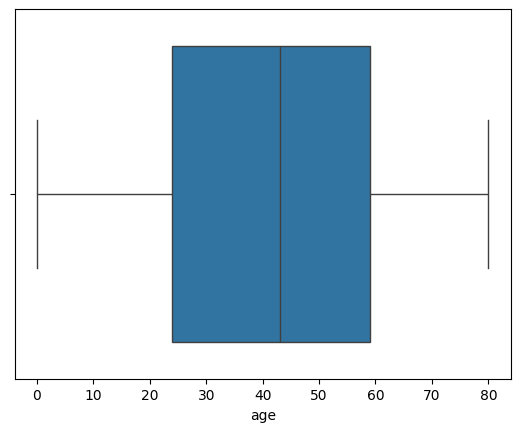

In [12]:
sns.boxplot(x=df['age'])

<Axes: xlabel='hypertension'>

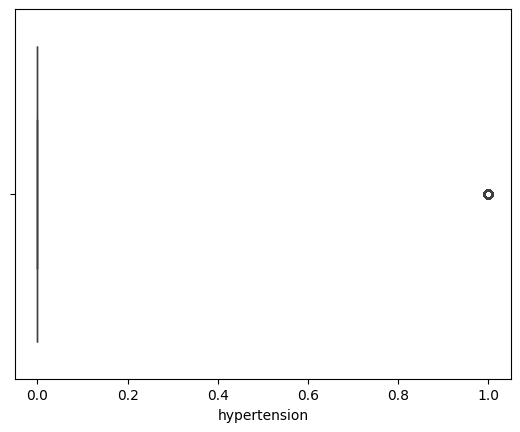

In [13]:
sns.boxplot(x=df['hypertension'])

<Axes: xlabel='heart_disease'>

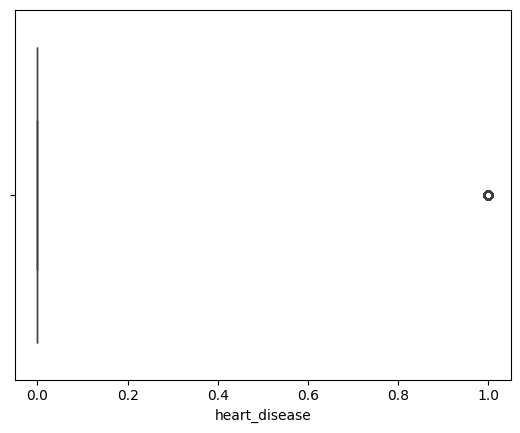

In [14]:
sns.boxplot(x=df['heart_disease'])

<Axes: xlabel='bmi'>

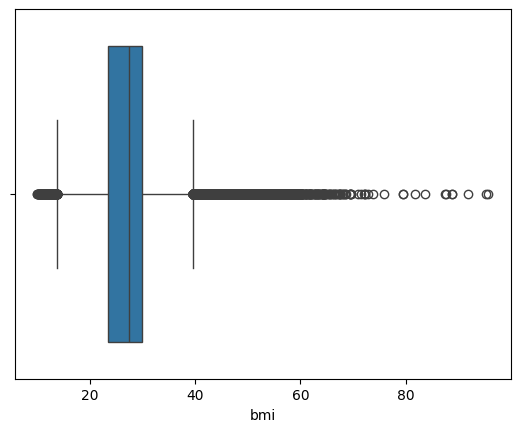

In [15]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='HbA1c_level'>

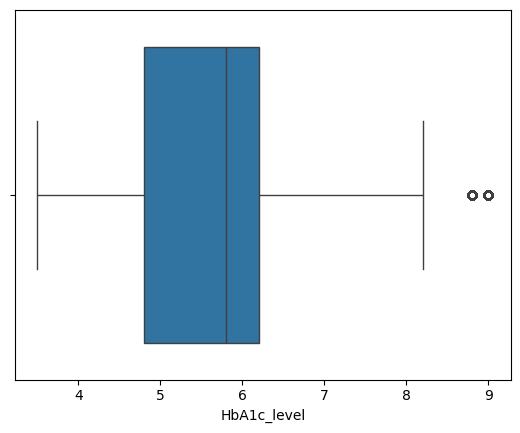

In [16]:
sns.boxplot(x=df['HbA1c_level'])

<Axes: xlabel='blood_glucose_level'>

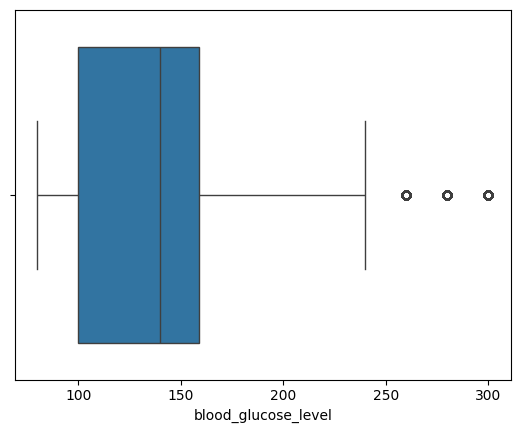

In [17]:
sns.boxplot(x=df['blood_glucose_level'])

**Insight:**
<br>Pada visualisasi bloxpot pada fitur-fitur numerik di atas, dapat kita lihat bahwa pada beberapa fitur numerik terdapat outliers.

In [18]:
# Ambil hanya kolom numerikal tertentu
num_cols = [ 'bmi', 'HbA1c_level', 'blood_glucose_level']
numeric_cols = [col for col in num_cols if col in df.columns]

# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(88195, 9)

Output di atas menunjukkan bahwa dataset sekarang telah bersih dan memiliki 88.195 sampel.

### Exploratory Data Analysis - Univariate Analysis

Pada tahap ini akan dilakukan proses analisis data dengan teknik Univariate EDA. Dimana disini data akan dibagi menjadi dua bagian, yaitu numerical features dan categorical features.

In [19]:
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
categorical_features = ['gender', 'smoking_history']

**Categorical Features**

        jumlah sampel  persentase
gender                           
Female          51179        58.0
Male            36998        42.0
Other              18         0.0


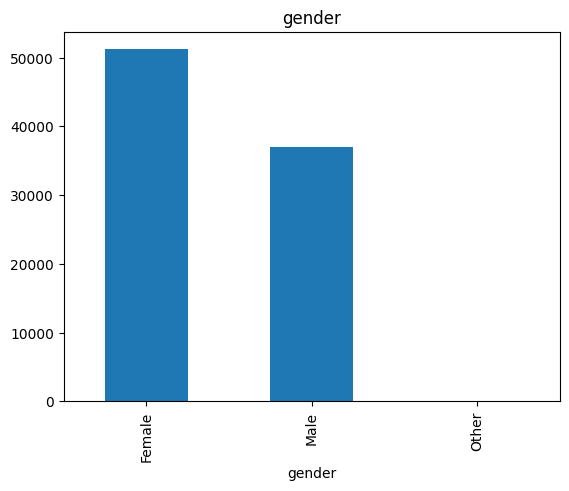

In [20]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_copy = df.copy()
df_copy = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_copy)
count.plot(kind='bar', title=feature);

**Insight**:

Terdapat 3 kategori pada fitur gender, secara berurutan dari jumlahnya yang paling banyak yaitu: Female, Male, dan Other. Dari data persentase dapat kita simpulkan bahwa ebagian besar data didominasi oleh gender Female (58%), diikuti oleh Male (42%), sementara kategori Other hampir tidak signifikan karena hanya mencakup 0.0% dari total data (hanya 18 sampel).

                 jumlah sampel  persentase
smoking_history                           
never                    31249        35.4
Missing                  31111        35.3
current                   8349         9.5
former                    8133         9.2
not current               5764         6.5
ever                      3589         4.1


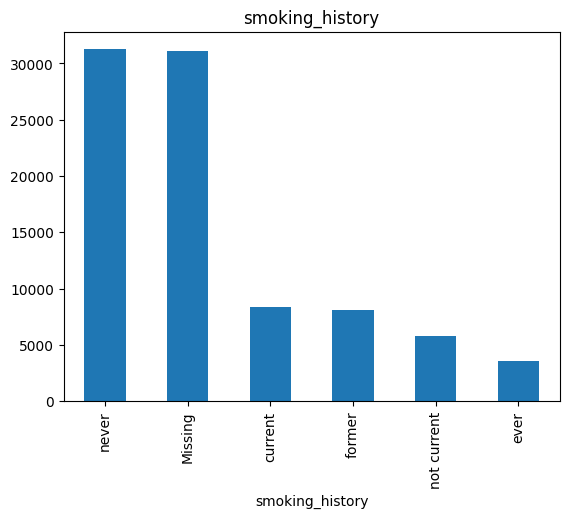

In [21]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_copy = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_copy)
count.plot(kind='bar', title=feature);

**Insight:**

Terdapat 6 kategori pada fitur gender, secara berurutan dari jumlahnya yang paling banyak yaitu: never, Missing, current, former, not current, dan ever. Mayoritas data berasal dari individu yang tidak pernah merokok (kategori never) sebesar 35.4%. Selain itu, proporsi terbesar berikutnya memiliki riwayat merokok yang tidak diketahui atau tidak diisi (kategori Missing) sebanyak 35.3%, yang berarti terdapat kekosongan informasi yang cukup besar dalam fitur ini. Kategori lainnya menunjukkan bahwa sebagian kecil populasi merupakan perokok aktif atau mantan perokok.

**Numerical Features**

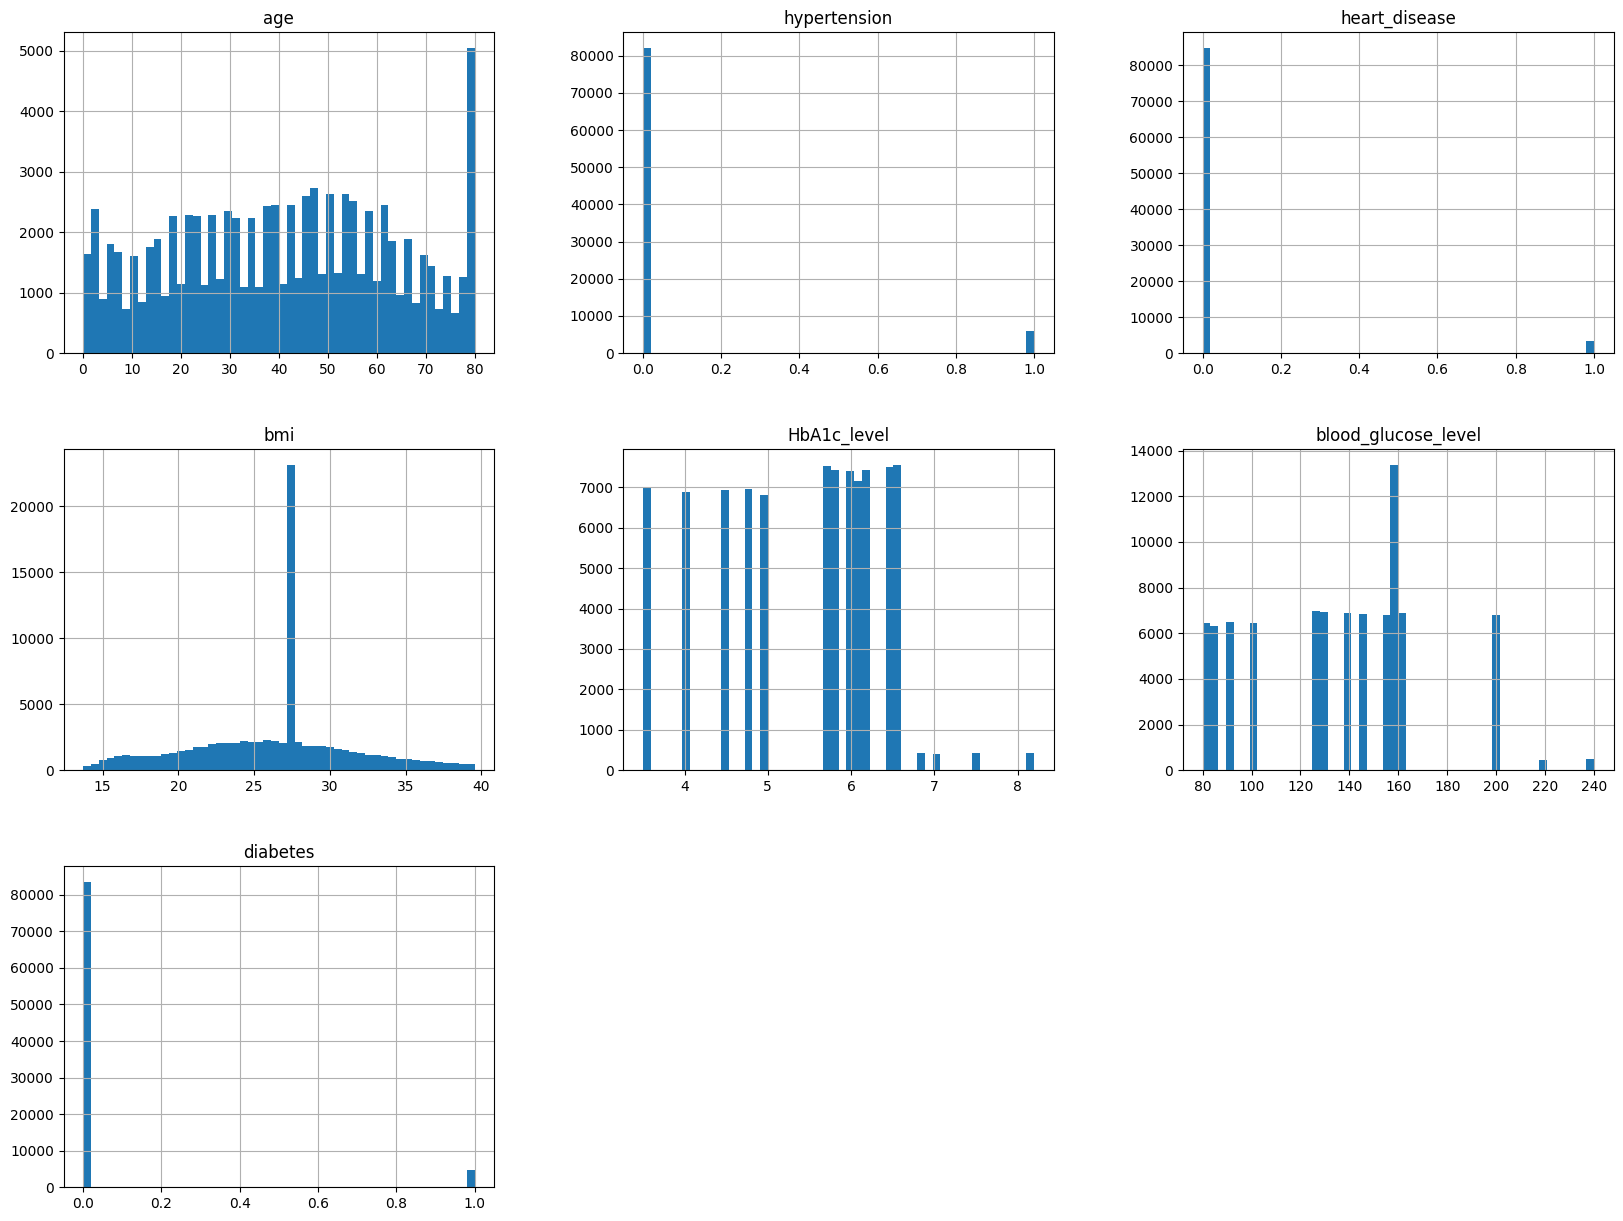

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:**

1. Fitur `age`
- Distribusi usia cukup merata dari usia muda hingga sekitar usia 70 tahun.
- Terlihat lonjakan signifikan pada usia 80 tahun, yang kemungkinan besar disebabkan oleh banyaknya data dengan nilai maksimum default (mungkin karena kesalahan pengisian atau default value).
- Secara keseluruhan, distribusinya mendekati uniform dengan outlier mencolok di usia 80.
2. Fitur `hypertension` & `heart_disease`
- Histogram menunjukkan bahwa sebagian besar individu dalam dataset memiliki nilai 0, artinya mayoritas tidak menderita hipertensi maupun penyakit jantung.
- Distribusi yang sangat tidak merata ini menandakan bahwa kedua fitur ini sangat tidak seimbang (imbalanced).
3. Fitur `bmi`
- Terlihat distribusi normal di kisaran 15–40.
- Namun, ada spike ekstrem di satu nilai (sekitar 28), menandakan banyak nilai BMI yang disamakan atau diisi default.
4. Fitur `HbA1c_level`
- Data memiliki nilai-nilai yang terdistribusi dalam nilai diskrit atau kategorikal meskipun secara medis harusnya numerik.
- Hal ini menandakan bahwa banyak nilai diatribusi pada angka-angka bulat, seperti 4.0, 5.0, 6.0, dan 7.0.
- Bentuk distribusinya tidak halus (tidak kontinu).
5. Fitur `blood_glucose_level`
- Distribusi tampak diskrit dan berpola, banyak titik spike pada angka tertentu.
- Terdapat lonjakan besar di sekitar nilai 160, menunjukkan kemungkinan data dominan berada di rentang tersebut.
6. Fitur `diabetes`
- Mayoritas nilai adalah 0, menunjukkan bahwa sebagian besar individu dalam dataset tidak menderita diabetes.
- Menunjukkan bahwa dataset tidak seimbang dalam label target, dengan jumlah penderita diabetes jauh lebih sedikit dibanding yang tidak.





### Exploratory Data Analysis - Multivariate Analysis

Pada tahap ini, akan dilakukan analisis data pada fitur kategori dan numerik terhadap target (`diabetes`)

**Categorical Features**

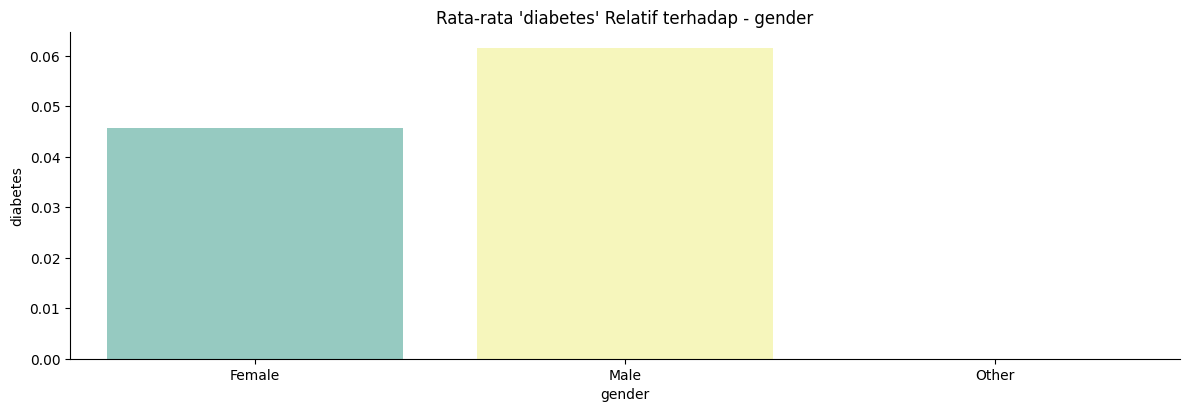

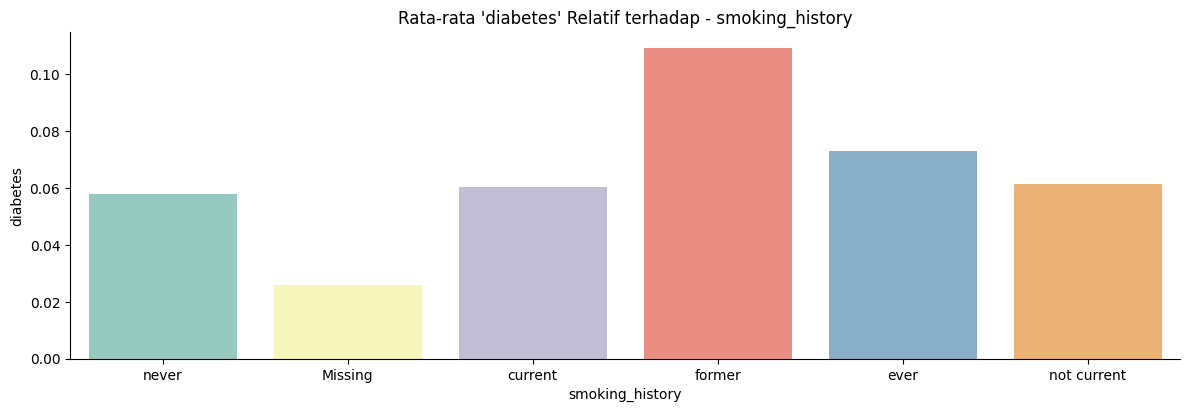

In [23]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="diabetes", kind="bar", hue=col, legend=False,
            dodge=False, height=4, aspect=3, data=df, palette="Set3", errorbar=None)
  plt.title("Rata-rata 'diabetes' Relatif terhadap - {}".format(col))

**Insight:**
1. Fitur `gender` vs `diabetes`
- Terlihat bahwa rata-rata penderita diabetes lebih tinggi pada kelompok laki-laki (Male) dibandingkan perempuan (Female).
- Nilai rata-rata diabetes untuk kelompok Other hampir nol, disebabkan oleh jumlah data yang sangat sedikit untuk kategori ini, sehingga kurang representatif secara statistik.
- Gender tampaknya memiliki pengaruh terhadap prevalensi diabetes, dengan laki-laki menunjukkan kecenderungan lebih tinggi terkena diabetes dibanding perempuan.
2. Fitur `smoking_history` vs `diabetes`
- Kelompok dengan riwayat merokok former (mantan perokok) menunjukkan rata-rata penderita diabetes tertinggi, mendekati 8%.
- Diikuti oleh kategori ever, not current, dan current dengan tingkat diabetes yang juga relatif tinggi.
- Kategori never memiliki tingkat diabetes yang lebih rendah dibanding mantan atau perokok aktif.
- Kategori Missing memiliki tingkat diabetes terendah, namun ini bisa disebabkan oleh kualitas data atau entri yang tidak lengkap.
- Riwayat merokok berhubungan dengan prevalensi diabetes. Mantan perokok memiliki risiko tertinggi, yang bisa jadi disebabkan oleh dampak kumulatif merokok di masa lalu.

**Numerical Features**

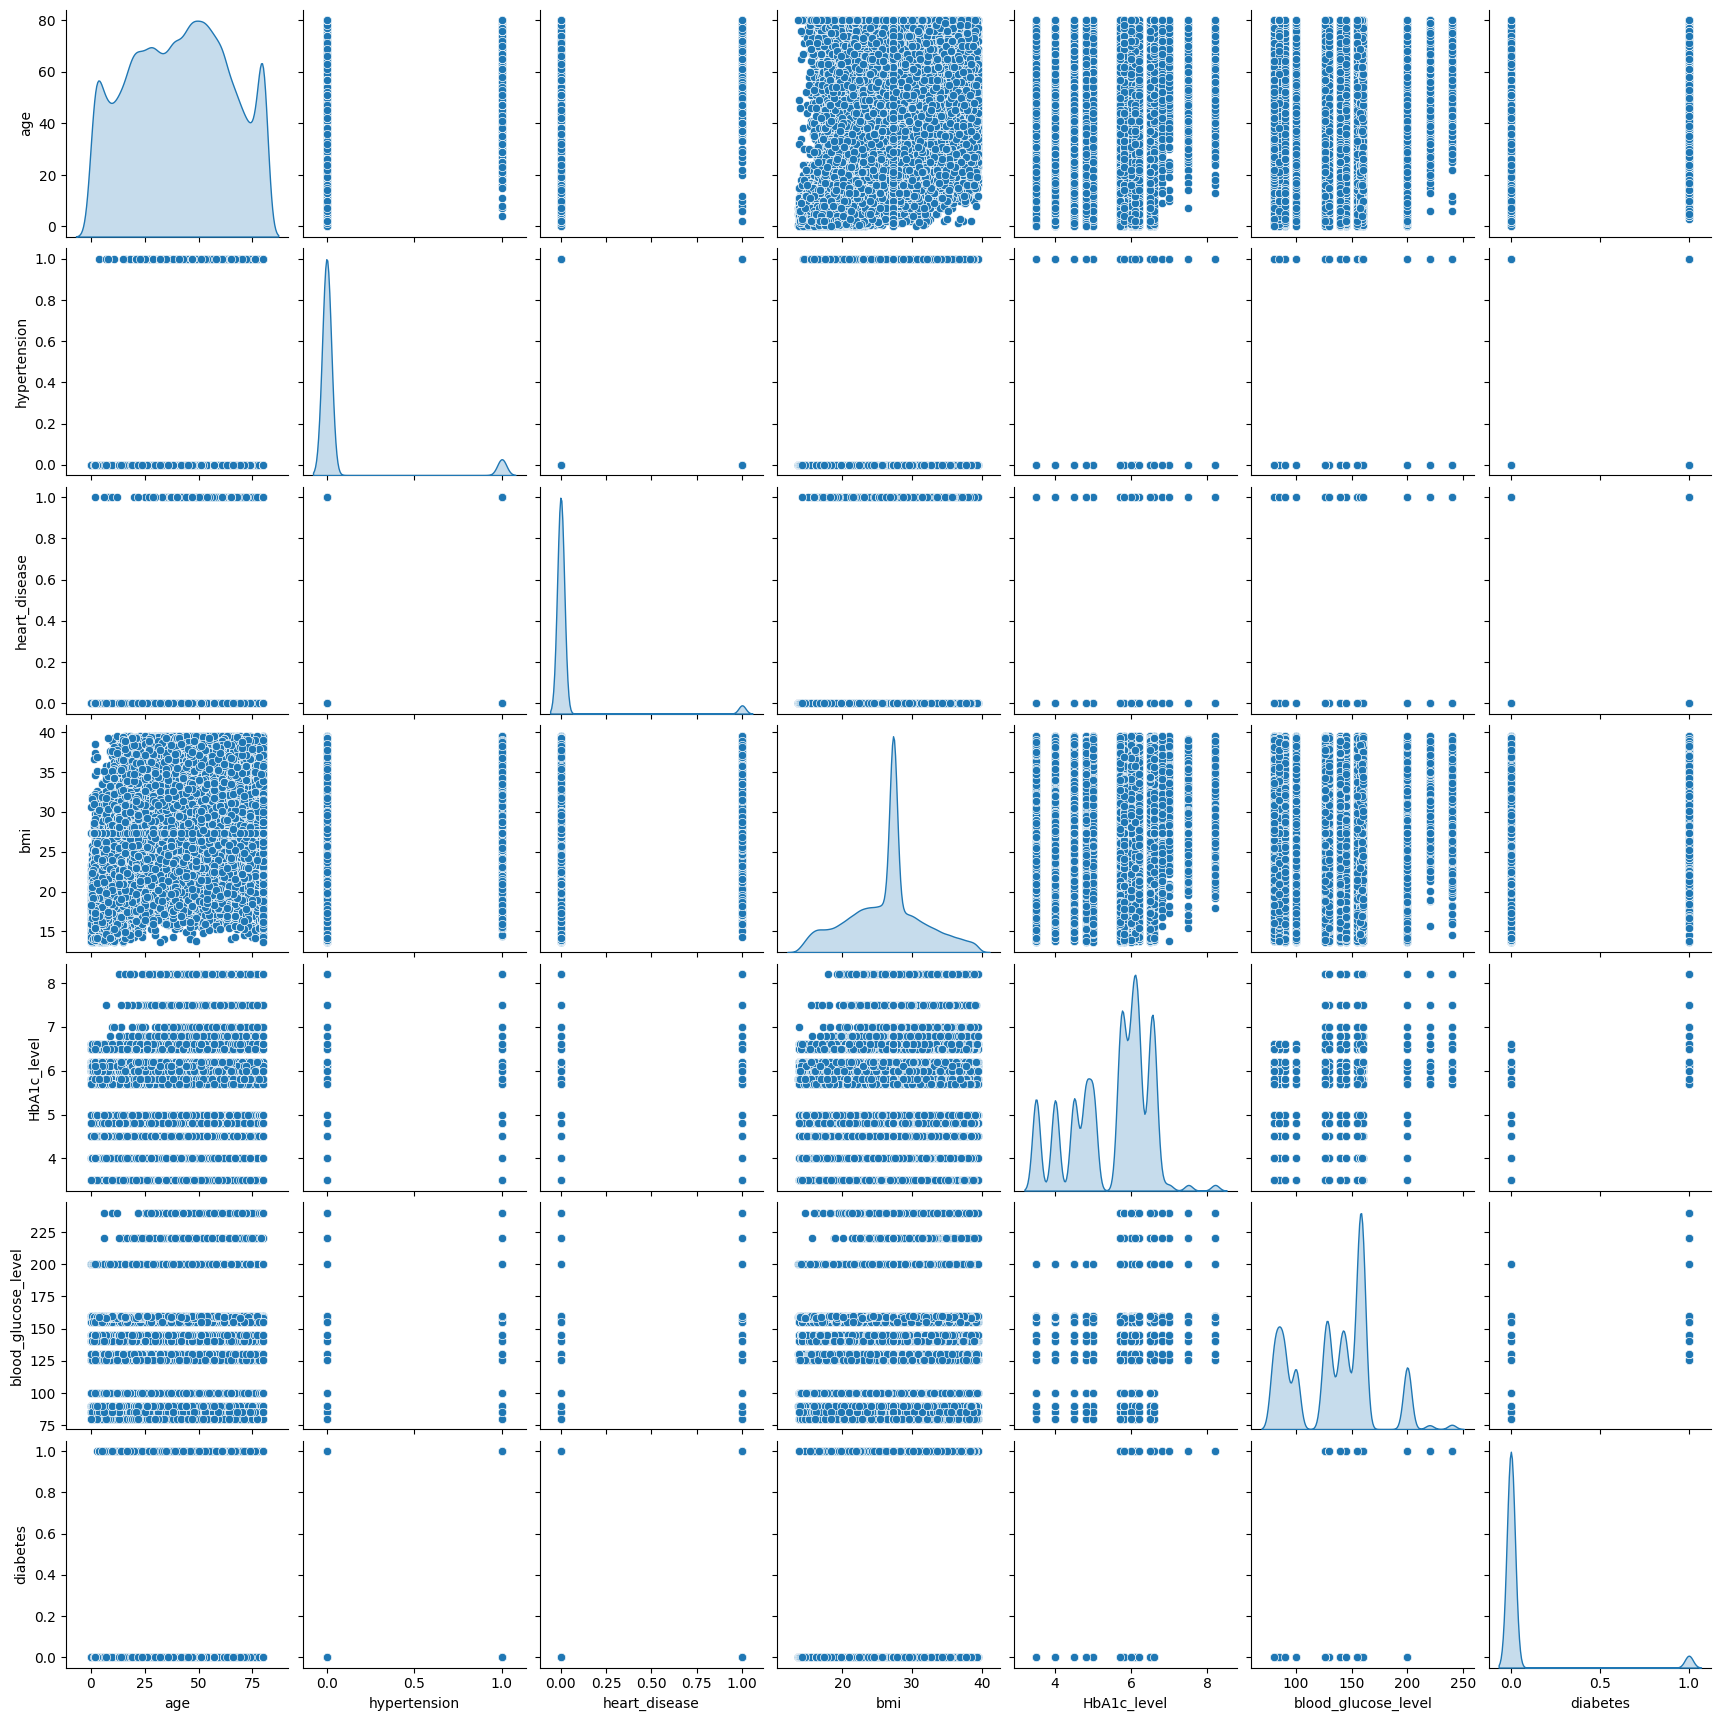

In [24]:
# Mengamati hubungan antar fitur numerik
sns.pairplot(df, diag_kind = 'kde')

**Insight:**

Pada pola sebaran data grafik pairplot, terlihat bahwa `age, HbA1c_level, blood_glucose_level, dan bmi` memiliki korelasi yang cukup kuat dengan fitur target diabetes. Hal ini ditunjukkan dengan adanya pola pemisahan yang jelas pada nilai-nilai diabetes (0 dan 1), terutama pada fitur `HbA1c_level dan blood_glucose_level` yang menunjukkan perbedaan distribusi yang signifikan antara penderita dan non-penderita diabetes. Sementara itu, fitur kategorikal biner seperti `hypertension dan heart_disease` terlihat memiliki korelasi yang lebih lemah terhadap diabetes, karena sebaran datanya tidak membentuk pola yang jelas dan masih tercampur antara kelas diabetes 0 dan 1.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

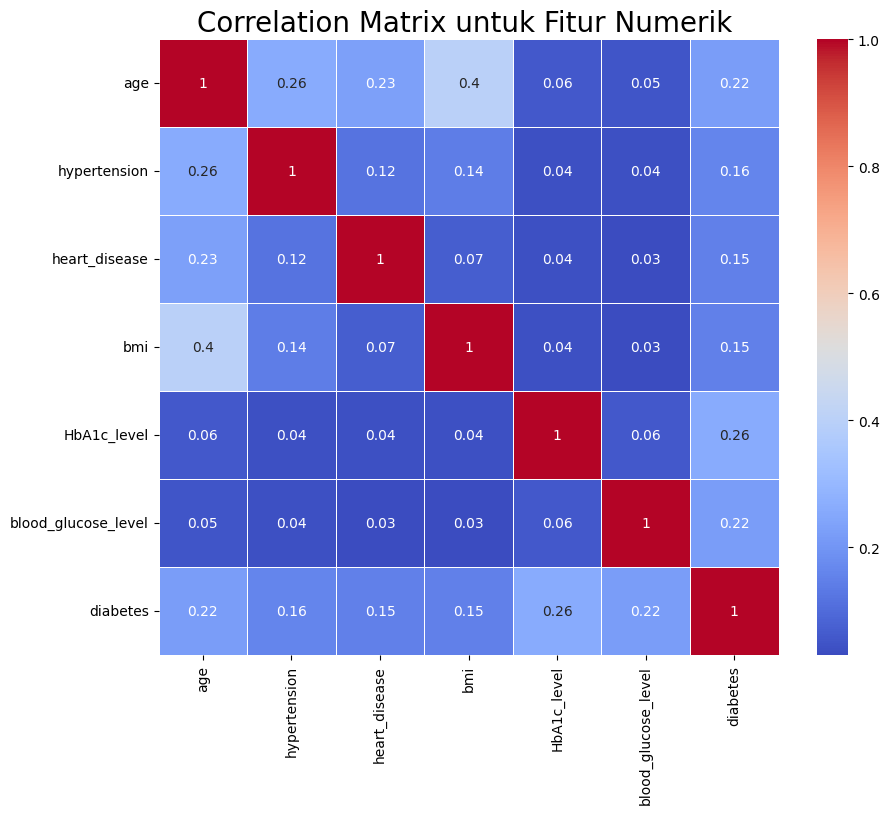

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Insight:**

Pada heatmap korelasi di atas, fitur `HbA1c_level` memiliki skor korelasi tertinggi dengan fitur target diabetes, yaitu 0.26, diikuti oleh `age dan blood_glucose_level` dengan nilai 0.22, serta `bmi, hypertension dan heart_disease` dengan nilai masing-masing 0.15, 0.16 dan 0.15. Artinya, fitur `HbA1c_level, age, dan blood_glucose_level` memiliki korelasi yang cukup berarti dengan diabetes. Sementara itu, fitur bmi, heart_disease, dan hypertension memiliki korelasi yang cukup lemah terhadap target.

## Data Preparation

Pada bagian ini akan dilakukan 3 tahap persiapan data, yaitu:
- Encoding fitur kategori.
- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi.

**Encoding Fitur Kategori**

In [26]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [27]:
df = pd.concat([df, pd.get_dummies(df['smoking_history'], prefix='smoking_history')],axis=1)
df.drop(['smoking_history'], axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_Missing,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False


**Train-Test-Split**

In [28]:
# Pisahkan fitur dan target
X = df.drop(["diabetes"], axis =1)
y = df["diabetes"]

# Split data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Tampilkan ukuran hasil split
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (70556, 13)
Test set: (17639, 13)


**Standarisasi**

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

Pada tahap ini, saya akan mengembangkan model machine learning dengan 5 algoritma. Kelima algoritma yang akan digunakan, antara lain:
1. Logistic Regression
2. K-Nearest Neighbor (KNN)
3. Support Vector Classifier (SVC)
4. Decision Tree
5. Random Forest

In [30]:
# Model Logistic
logistic = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
# Model KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance', metric = 'minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [32]:
# Model SVC
svc = SVC(kernel = 'rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state = 42)
svc.fit(X_train,y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [33]:
# Model Decision Tree
decisionTree = DecisionTreeClassifier(criterion= 'entropy', class_weight='balanced', random_state=42)
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [34]:
# Model Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion= 'entropy', class_weight='balanced', random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=42)

## Evaluation

In [35]:
# Prediksi
y_pred_logreg = logistic.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_dt = decisionTree.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Inisialisasi tabel evaluasi
model_scores = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc'],
                            columns=['LogisticRegression', 'KNN', 'SVC', 'DecisionTree', 'RandomForest'])

# Logistic Regression
model_scores.loc['accuracy', 'LogisticRegression'] = accuracy_score(y_test, y_pred_logreg)
model_scores.loc['precision', 'LogisticRegression'] = precision_score(y_test, y_pred_logreg)
model_scores.loc['recall', 'LogisticRegression'] = recall_score(y_test, y_pred_logreg)
model_scores.loc['f1_score', 'LogisticRegression'] = f1_score(y_test, y_pred_logreg)
model_scores.loc['roc_auc', 'LogisticRegression'] = roc_auc_score(y_test, logistic.predict_proba(X_test)[:,1])

# KNN
model_scores.loc['accuracy', 'KNN'] = accuracy_score(y_test, y_pred_knn)
model_scores.loc['precision', 'KNN'] = precision_score(y_test, y_pred_knn)
model_scores.loc['recall', 'KNN'] = recall_score(y_test, y_pred_knn)
model_scores.loc['f1_score', 'KNN'] = f1_score(y_test, y_pred_knn)
model_scores.loc['roc_auc', 'KNN'] = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

# SVC
model_scores.loc['accuracy', 'SVC'] = accuracy_score(y_test, y_pred_svc)
model_scores.loc['precision', 'SVC'] = precision_score(y_test, y_pred_svc)
model_scores.loc['recall', 'SVC'] = recall_score(y_test, y_pred_svc)
model_scores.loc['f1_score', 'SVC'] = f1_score(y_test, y_pred_svc)
model_scores.loc['roc_auc', 'SVC'] = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])

# Decision Tree
model_scores.loc['accuracy', 'DecisionTree'] = accuracy_score(y_test, y_pred_dt)
model_scores.loc['precision', 'DecisionTree'] = precision_score(y_test, y_pred_dt)
model_scores.loc['recall', 'DecisionTree'] = recall_score(y_test, y_pred_dt)
model_scores.loc['f1_score', 'DecisionTree'] = f1_score(y_test, y_pred_dt)
model_scores.loc['roc_auc', 'DecisionTree'] = roc_auc_score(y_test, decisionTree.predict_proba(X_test)[:,1])

# Random Forest
model_scores.loc['accuracy', 'RandomForest'] = accuracy_score(y_test, y_pred_rf)
model_scores.loc['precision', 'RandomForest'] = precision_score(y_test, y_pred_rf)
model_scores.loc['recall', 'RandomForest'] = recall_score(y_test, y_pred_rf)
model_scores.loc['f1_score', 'RandomForest'] = f1_score(y_test, y_pred_rf)
model_scores.loc['roc_auc', 'RandomForest'] = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

# Tampilkan hasil akhir
print("Hasil Evaluasi Model Klasifikasi:")
model_scores

Hasil Evaluasi Model Klasifikasi:


,LogisticRegression,KNN,SVC,DecisionTree,RandomForest
accuracy,0.845229,0.959068,0.843869,0.953966,0.969783
precision,0.237569,0.688312,0.242612,0.56017,0.840278
recall,0.883243,0.401081,0.931892,0.568649,0.523243
f1_score,0.374427,0.506831,0.384993,0.564378,0.644903
roc_auc,0.9428,0.831969,0.943392,0.772177,0.884897


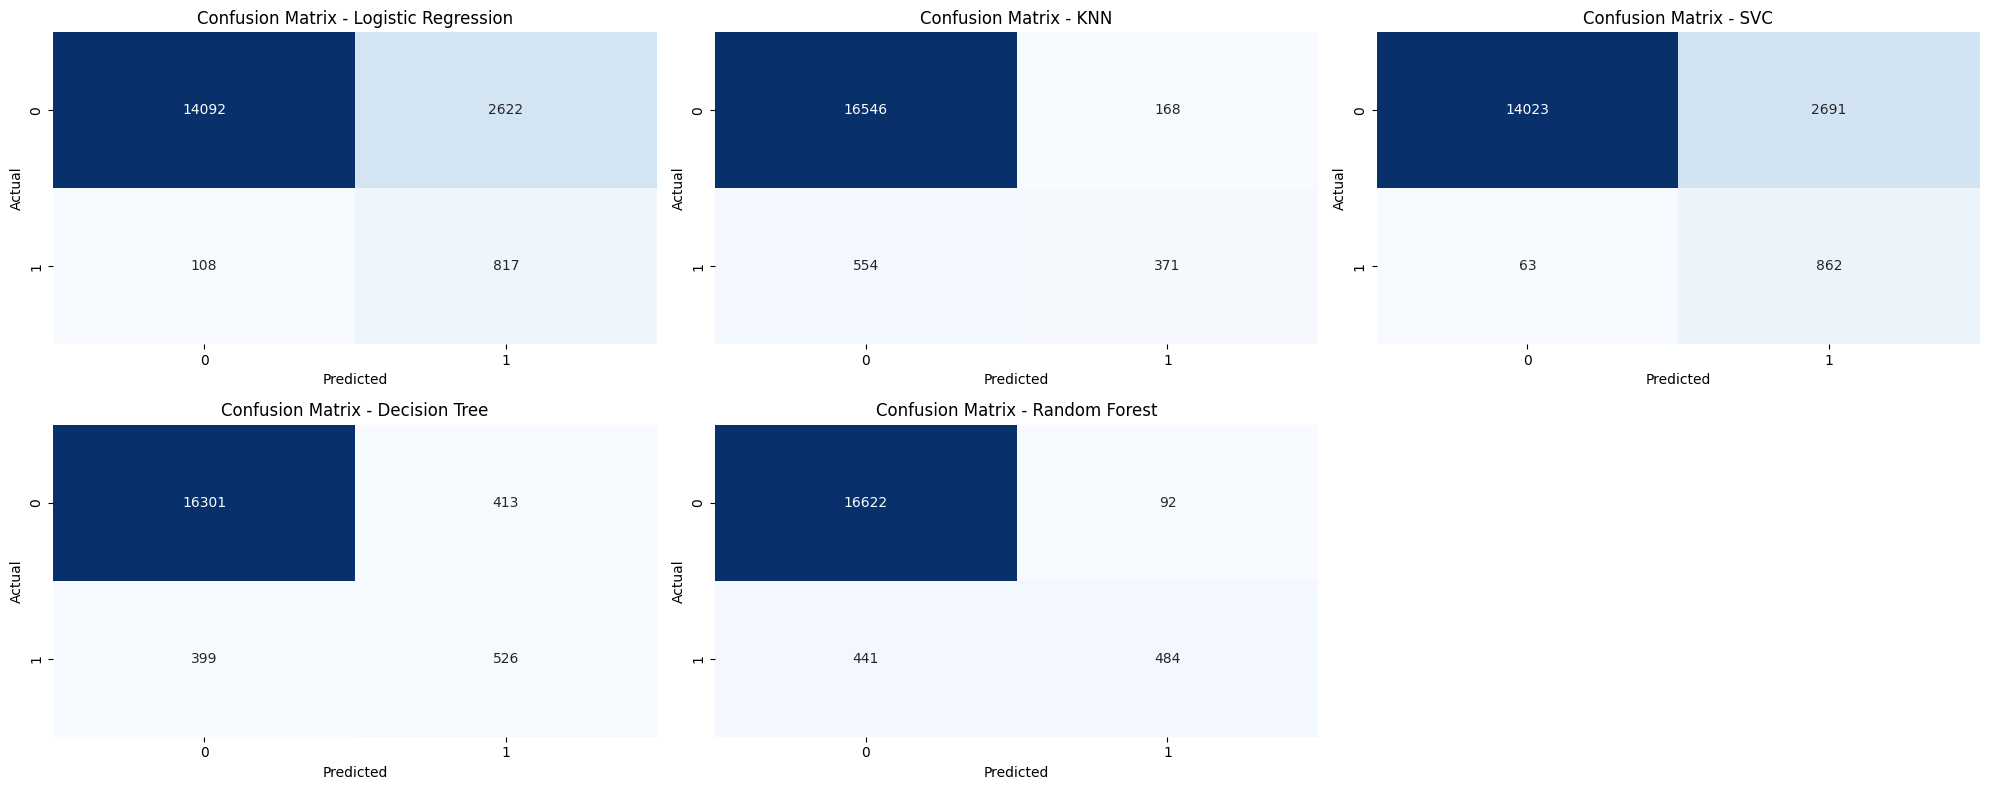

In [36]:
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Panggil confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

plot_confusion_matrix(axes[0], y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(axes[1], y_test, y_pred_knn, "KNN")
plot_confusion_matrix(axes[2], y_test, y_pred_svc, "SVC")
plot_confusion_matrix(axes[3], y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(axes[4], y_test, y_pred_rf, "Random Forest")

fig.delaxes(axes[5])  # Menghapus subplot terakhir yang tidak dipakai

plt.tight_layout()
plt.show()

<ipython-input-37-2297f028e38c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


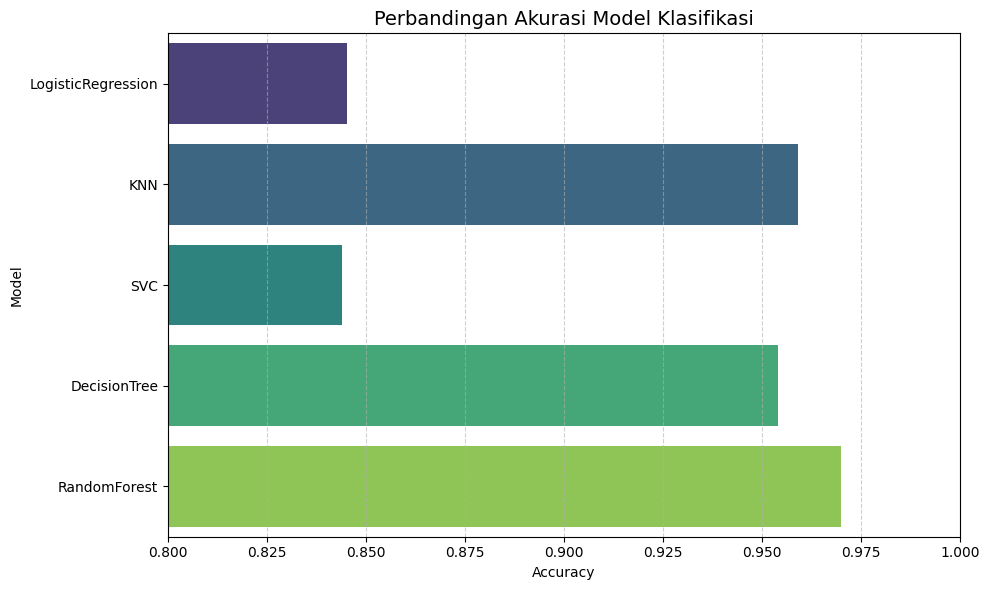

In [37]:
# Visualisasi perbandingan akurasi setiap model
accuracy_df = model_scores.loc['accuracy'].reset_index()
accuracy_df.columns = ['Model', 'Accuracy']

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Perbandingan Akurasi Model Klasifikasi', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

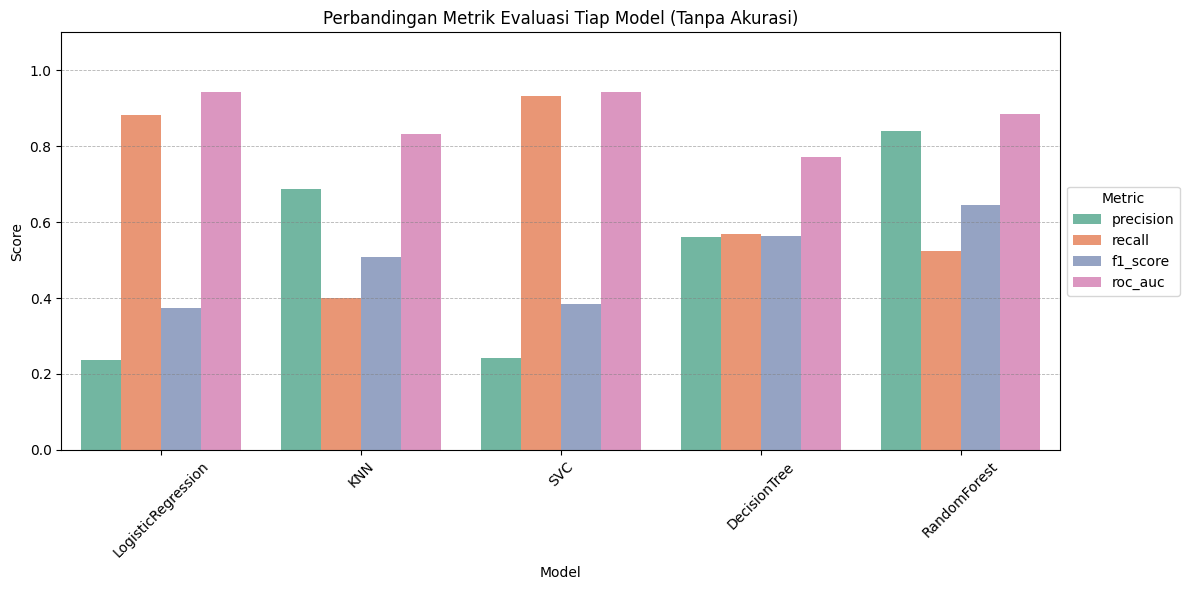

In [38]:
# Transpose dan ubah ke long format
df_plot = model_scores.T.reset_index().rename(columns={'index': 'Model'})
df_long = pd.melt(df_plot, id_vars='Model', var_name='Metric', value_name='Score')
df_long = df_long[df_long['Metric'] != 'accuracy']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Perbandingan Metrik Evaluasi Tiap Model (Tanpa Akurasi)')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))

for y in [0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.show()

**Insight:**

Dari hasil evaluasi di atas, dapat disimpulkan bahwa:
-  Random Forest menunjukkan performa terbaik dengan akurasi, precision, dan F1-score tertinggi, menandakan prediksi yang seimbang dan kemampuan generalisasi yang baik.
- KNN memiliki akurasi tinggi, namun recall rendah, yang berarti model sering gagal mendeteksi kelas positif (banyak false negative), sehingga kurang andal dalam konteks deteksi kasus penting.
- Decision Tree juga memiliki akurasi tinggi, tetapi F1-score dan recall-nya lebih rendah dari Random Forest, menunjukkan performa yang masih belum optimal meskipun cukup stabil.
- Sementara itu, Logistic Regression dan SVC memiliki recall sangat tinggi namun precision rendah, mengindikasikan kecenderungan overpredict kelas positif dan menghasilkan banyak false positive.

## Hyperparameter Tuning on the Best Model

Langkah selanjutnya adalah melakukan hyperparameter tuning pada model terbaik (dalam hal ini Random Forest) untuk mengoptimalkan performa berdasarkan metrik evaluasi.

In [39]:
# Grid parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Setup GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

# Fit ke data training
grid_search.fit(X_train, y_train)

# Model terbaik hasil tuning
best_rf = grid_search.best_estimator_

# Print parameter terbaik
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Model Evaluation After Tuning

Setelah melakukan tuning pada model terbaik, selanjutnya adalah melakukan evaluasi kembali pada modelnya.

In [40]:
# Prediksi
y_pred_best_rf = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best_rf)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print(cm_df)

print("ROC AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16714
           1       0.88      0.51      0.65       925

    accuracy                           0.97     17639
   macro avg       0.93      0.76      0.82     17639
weighted avg       0.97      0.97      0.97     17639

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        16647           67
Actual 1          449          476
ROC AUC: 0.9477235138692599


**Insight:**

- Akurasi model tetap tinggi baik sebelum maupun sesudah tuning, menunjukkan performa umum yang kuat. Namun, ini kurang mencerminkan kemampuan model terhadap kelas minoritas.
- Precision kelas 1 meningkat dari 0.84 menjadi 0.88 setelah tuning. Artinya, model hasil tuning lebih tepat dalam mengidentifikasi kasus positif, dengan lebih sedikit false positives.
- Recall kelas 1 sedikit menurun dari 0.52 menjadi 0.51. Artinya, model agak lebih selektif, sehingga sedikit lebih banyak kasus positif yang terlewat (false negatives).
- F1-score kelas 1 meningkat dari 0.64 ke 0.65, menandakan peningkatan keseimbangan antara precision dan recall.
- ROC AUC meningkat signifikan dari 0.8849 menjadi 0.9477, yang menunjukkan peningkatan kemampuan model dalam membedakan antar kelas secara keseluruhan, terlepas dari threshold.
- Confusion matrix sesudah tuning menunjukkan penurunan false positives dan sedikit peningkatan false negatives, yang konsisten dengan perubahan metrik di atas.

Secara keseluruhan, tuning pada model Random Forest berhasil meningkatkan performa keseluruhan, terutama dalam kemampuan membedakan kelas (ROC AUC naik), serta ketepatan prediksi terhadap kelas minoritas (precision dan f1-score naik), meskipun dengan sedikit penurunan pada recall.

In [41]:
# Prediksi train dan test untuk semua model
models = {
    'LogisticRegression': logistic,
    'KNN': knn,
    'SVC': svc,
    'DecisionTree': decisionTree,
    'RandomForest': rf,
    'RandomForest (setelah tuning)': best_rf
}

train_accuracies = {}
test_accuracies = {}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracies[name] = accuracy_score(y_train, y_train_pred)
    test_accuracies[name] = accuracy_score(y_test, y_test_pred)

# Buat DataFrame
accuracy_table = pd.DataFrame({
    'train': train_accuracies,
    'test': test_accuracies
})

# Transpose agar model jadi baris
accuracy_table = accuracy_table.T

# Tampilkan
accuracy_table

,LogisticRegression,KNN,SVC,DecisionTree,RandomForest,RandomForest (setelah tuning)
train,0.845187,0.999164,0.844889,0.999164,0.994416,0.999164
test,0.845229,0.959068,0.843869,0.953966,0.969783,0.970747


**Insight:**

Berdasarkan hasil di atas, model Random Forest setelah tuning sangat baik, dengan akurasi tinggi dan generalisasi kuat. Tidak terlihat tanda overfitting yang serius. Sehingga menjadi model terbaik untuk proyek ini.

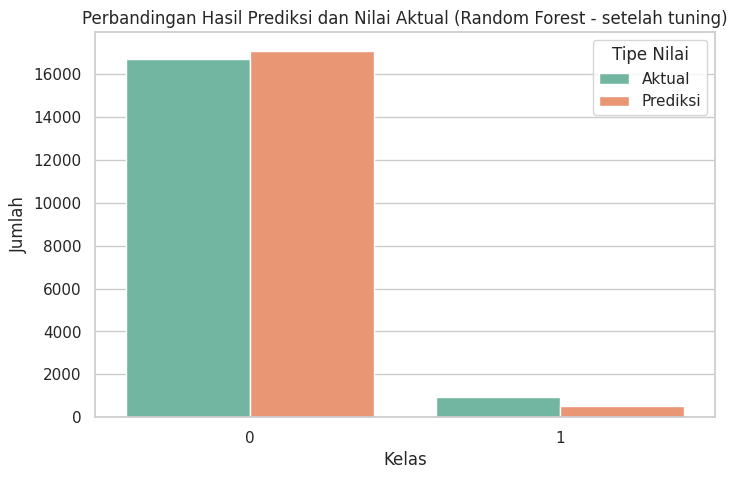

In [44]:
sns.set(style="whitegrid")

# Buat dataframe hasil
import pandas as pd
df_rf = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred_best_rf})

# Plot perbandingan
plt.figure(figsize=(8,5))
sns.countplot(data=df_rf.melt(), x='value', hue='variable', palette='Set2')
plt.title('Perbandingan Hasil Prediksi dan Nilai Aktual (Random Forest - setelah tuning)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.legend(title='Tipe Nilai')
plt.show()

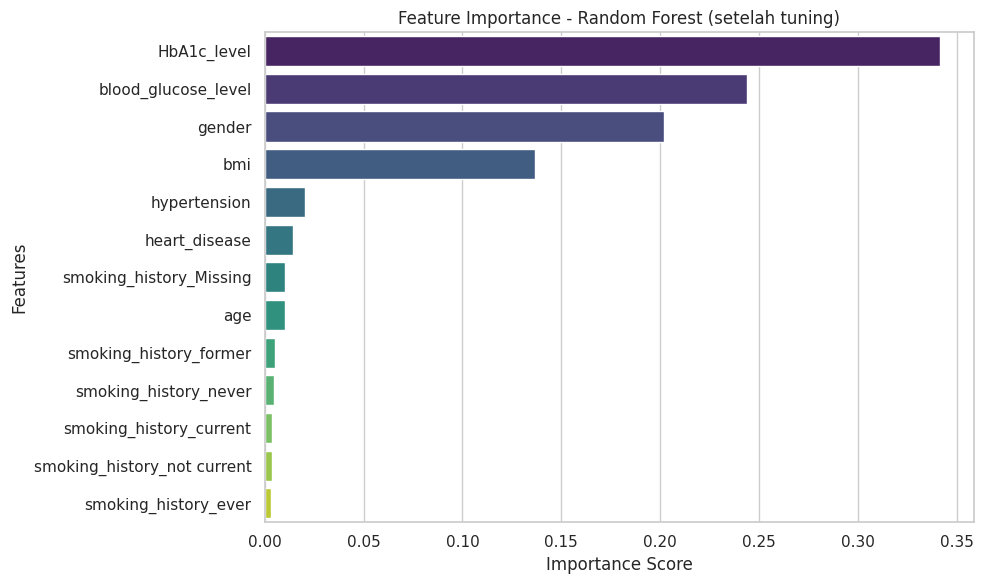

In [45]:
feature_names = ['age', 'gender', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
                 'blood_glucose_level', 'smoking_history_Missing', 'smoking_history_current', 'smoking_history_ever',
                 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title('Feature Importance - Random Forest (setelah tuning)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Berdasarkan features importance di atas, berikut adalah fitur-fitur yang paling berpengaruh dalam terhadap prediksi diabetes:
1. `HbA1c_level` (Kadar HbA1c)
Fitur ini adalah yang paling berpengaruh dalam model. HbA1c mencerminkan kadar gula darah rata-rata dalam beberapa bulan terakhir. Nilai yang tinggi menunjukkan risiko diabetes yang lebih besar, sehingga sangat berpengaruh dalam menentukan prediksi, kemungkinan terkait risiko komplikasi kesehatan.
2. `blood_glucose_level` (Kadar Glukosa Darah)
Kadar glukosa darah juga menjadi faktor penting. Glukosa darah yang tinggi bisa menandakan kondisi prediabetes atau diabetes, yang merupakan indikator utama dalam risiko kesehatan jangka panjang.
3. `gender` (Jenis Kelamin)
Jenis kelamin juga memainkan peran penting. Dalam banyak studi medis, risiko terhadap penyakit tertentu bisa berbeda antara pria dan wanita, sehingga gender dapat memengaruhi prediksi model, terutama untuk kondisi metabolik atau kardiovaskular.
4. `bmi` (Indeks Massa Tubuh)
BMI menunjukkan proporsi berat terhadap tinggi badan dan menjadi indikator obesitas. Nilai BMI yang tinggi sering dikaitkan dengan risiko penyakit seperti jantung, hipertensi, dan diabetes, sehingga model memberi bobot cukup tinggi pada fitur ini.